In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import gzip
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_columns = 999

In [84]:
train = pd.read_csv('/Users/Mags/Desktop/DATA SCIENCE/Kaggle_Yell/ShelterAnimals/train.csv', index_col=[0])
#test = pd.read_csv('/Users/Mags/Desktop/DATA SCIENCE/Kaggle_Yell/ShelterAnimals/test.csv', index_col=[0])

with open('test.csv', 'rb') as fd:
    gzip_fd = gzip.GzipFile(fileobj=fd)
    test = pd.read_csv(gzip_fd)

In [51]:
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
AnimalID,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [52]:
outcome_stat = train.groupby('OutcomeType')['Name'].count().sort_values()

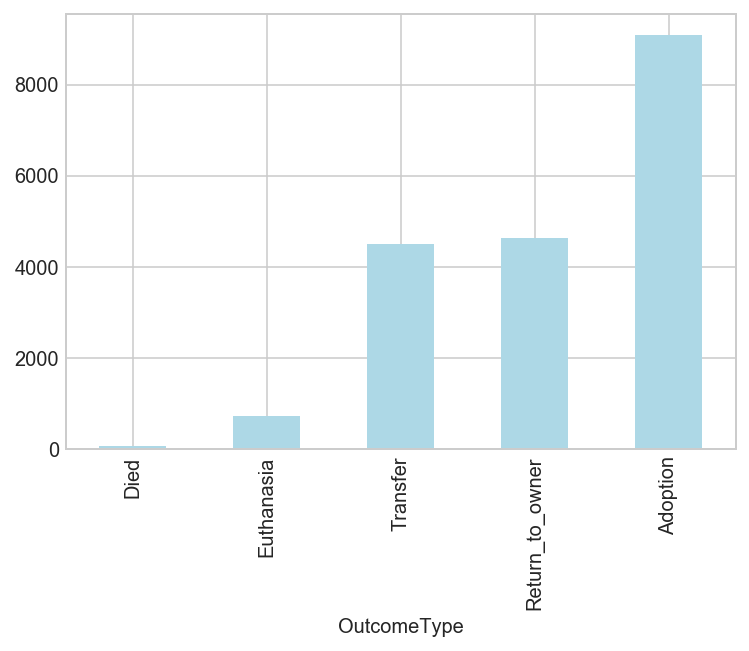

In [53]:
outcome_stat.plot(kind='bar', color='#ADD8E6')

In [54]:
outcome_stat / train.shape[0] * 100

OutcomeType
Died                0.288077
Euthanasia          2.768529
Transfer           16.824423
Return_to_owner    17.333234
Adoption           34.011748
Name: Name, dtype: float64

In [55]:
train.isnull().sum()

Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26729 entries, A671945 to A706629
Data columns (total 9 columns):
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(9)
memory usage: 2.0+ MB


In [57]:
train['Breed'].value_counts().head(20)

Domestic Shorthair Mix       8810
Pit Bull Mix                 1906
Chihuahua Shorthair Mix      1766
Labrador Retriever Mix       1363
Domestic Medium Hair Mix      839
German Shepherd Mix           575
Domestic Longhair Mix         520
Siamese Mix                   389
Australian Cattle Dog Mix     367
Dachshund Mix                 318
Boxer Mix                     245
Miniature Poodle Mix          233
Border Collie Mix             229
Australian Shepherd Mix       163
Rat Terrier Mix               157
Catahoula Mix                 157
Jack Russell Terrier Mix      146
Domestic Shorthair            143
Yorkshire Terrier Mix         143
Chihuahua Longhair Mix        142
Name: Breed, dtype: int64

In [58]:
train[train['Breed'].str.contains('Mix')].shape[0] / train.shape[0] * 100

83.42249990646863

In [59]:
train['AgeuponOutcome'].value_counts()

1 year       3969
2 years      3742
2 months     3397
3 years      1823
1 month      1281
3 months     1277
4 years      1071
5 years       992
4 months      888
6 years       670
3 weeks       659
5 months      652
6 months      588
8 years       536
7 years       531
2 weeks       529
10 months     457
10 years      446
8 months      402
4 weeks       334
9 years       288
7 months      288
12 years      234
9 months      224
1 weeks       171
11 months     166
1 week        146
13 years      143
11 years      126
3 days        109
2 days         99
14 years       97
15 years       85
1 day          66
4 days         50
6 days         50
16 years       36
5 days         24
0 years        22
17 years       17
5 weeks        11
18 years       10
19 years        3
20 years        2
Name: AgeuponOutcome, dtype: int64

In [60]:
train['AgeList'] = train['AgeuponOutcome'].str.split(' ')
train['AgeList'].head()

AnimalID
A671945     [1, year]
A656520     [1, year]
A686464    [2, years]
A683430    [3, weeks]
A667013    [2, years]
Name: AgeList, dtype: object

In [61]:
train.dropna(axis=0, subset=['AgeuponOutcome'], inplace=True)
train.isnull().sum()

Name               7673
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome        0
Breed                 0
Color                 0
AgeList               0
dtype: int64

In [62]:
train['NumberOfPeriod'] = train['AgeuponOutcome'].apply(lambda x: x.split(' ')[0])
train['Period'] = train['AgeuponOutcome'].apply(lambda x: x.split(' ')[1])
train.drop('AgeList', axis=1, inplace=True)
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,NumberOfPeriod,Period
AnimalID,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,1,year
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,year
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2,years
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,3,weeks
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2,years


In [63]:
def get_days(row):
    if row['Period'] == 'year' or row['Period'] == 'years':
        return int(row['NumberOfPeriod']) * 365
    elif row['Period'] == 'months' or row['Period'] == 'month':
        return int(row['NumberOfPeriod']) * 30.5
    elif row['Period'] == 'weeks' or row['Period'] == 'week':
        return int(row['NumberOfPeriod']) * 7
    else:
        return int(row['NumberOfPeriod'])
    
train['NumberOfDays'] = train.apply(get_days, axis=1)
train['NumberOfDays'].head()

AnimalID
A671945    365.0
A656520    365.0
A686464    730.0
A683430     21.0
A667013    730.0
Name: NumberOfDays, dtype: float64

In [64]:
train.drop('AgeuponOutcome', axis=1, inplace=True)
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,NumberOfPeriod,Period,NumberOfDays
AnimalID,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,year,365.0
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,year,365.0
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,2,years,730.0
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,3,weeks,21.0
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2,years,730.0


In [65]:
train['AnimalType'].value_counts()

Dog    15594
Cat    11117
Name: AnimalType, dtype: int64

In [66]:
train['Bin'], bin_edge = pd.cut(train['NumberOfDays'], bins=73, labels=False, retbins=True)
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,NumberOfPeriod,Period,NumberOfDays,Bin
AnimalID,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,year,365.0,3
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,year,365.0,3
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,2,years,730.0,7
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,3,weeks,21.0,0
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2,years,730.0,7


In [67]:
cross = pd.crosstab(index=train['Bin'], columns=train['OutcomeType'])
print(cross)

OutcomeType  Adoption  Died  Euthanasia  Return_to_owner  Transfer
Bin                                                               
0                3891   129         274              146      3785
1                1093     7          63              146       819
2                 438     2          26              136       312
3                1941    14         192              817      1628
7                1319    17         275              917      1214
10                602     7         141              589       484
14                340     1          78              390       262
18                301     3          94              357       237
21                204     0          53              251       162
25                151     3          41              217       119
29                166     1          51              199       119
32                 86     1          38              113        50
36                108     9          69              156      

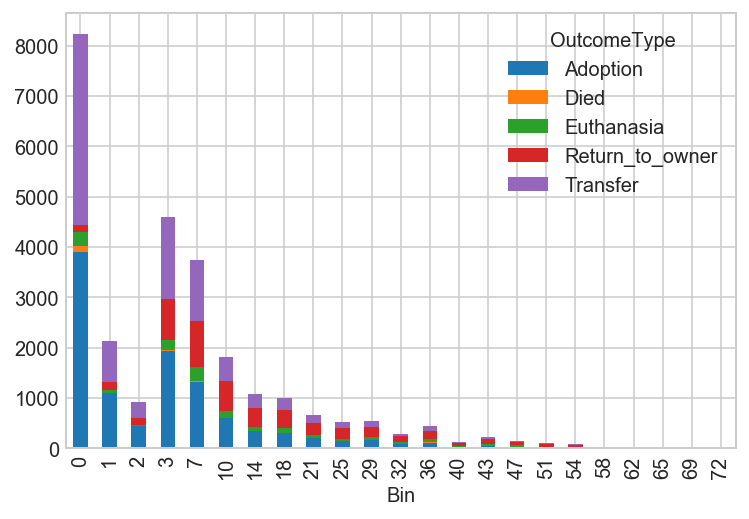

In [68]:
cross.plot(kind='bar', stacked=True)

In [69]:
cross['Total'] = cross.sum(axis=1)
cross

OutcomeType,Adoption,Died,Euthanasia,Return_to_owner,Transfer,Total
Bin,,,,,,
0,3891,129,274,146,3785,8225
1,1093,7,63,146,819,2128
2,438,2,26,136,312,914
3,1941,14,192,817,1628,4592
7,1319,17,275,917,1214,3742
10,602,7,141,589,484,1823
14,340,1,78,390,262,1071
18,301,3,94,357,237,992
21,204,0,53,251,162,670


In [70]:
print(values)

NameError: name 'values' is not defined

In [ ]:
for i in range(cross.shape[0]):
    plt.figure()
    cross.iloc[i].plot(kind='barh')
    plt.title('Bin {}'.format(i))

In [ ]:
year1 = train[train['NumberOfDays'] <= 365].copy()
year1['NumberOfDays'].plot(kind='hist')

In [ ]:
year2 = train[(train['NumberOfDays'] > 365) | (train['NumberOfDays'] < (365 * 2))].copy()
year2['NumberOfDays'].plot(kind='hist')

In [ ]:
train['Bin'].value_counts().sort_index().plot(kind='bar', color='blue')

In [ ]:
train['Bin'].nunique()

## ==========================

#### ANIMAL TYPE

In [ ]:
train.AnimalType.value_counts()

In [ ]:
# Does outcome depend on animal type?
sns.factorplot("AnimalType", col="OutcomeType", col_wrap=3, data=train, 
               kind="count", size=4, aspect=.8, palette = "inferno")
plt.show()

#### NAME VS NO NAME

In [71]:
#Adding new binary column to indicate whether animal had a name
train["Has_Name"] = train['Name'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [72]:
train.head()

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,NumberOfPeriod,Period,NumberOfDays,Bin,Has_Name
AnimalID,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,year,365.0,3,1
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,year,365.0,3,1
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,2,years,730.0,7,1
A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,Domestic Shorthair Mix,Blue Cream,3,weeks,21.0,0,0
A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,Lhasa Apso/Miniature Poodle,Tan,2,years,730.0,7,0


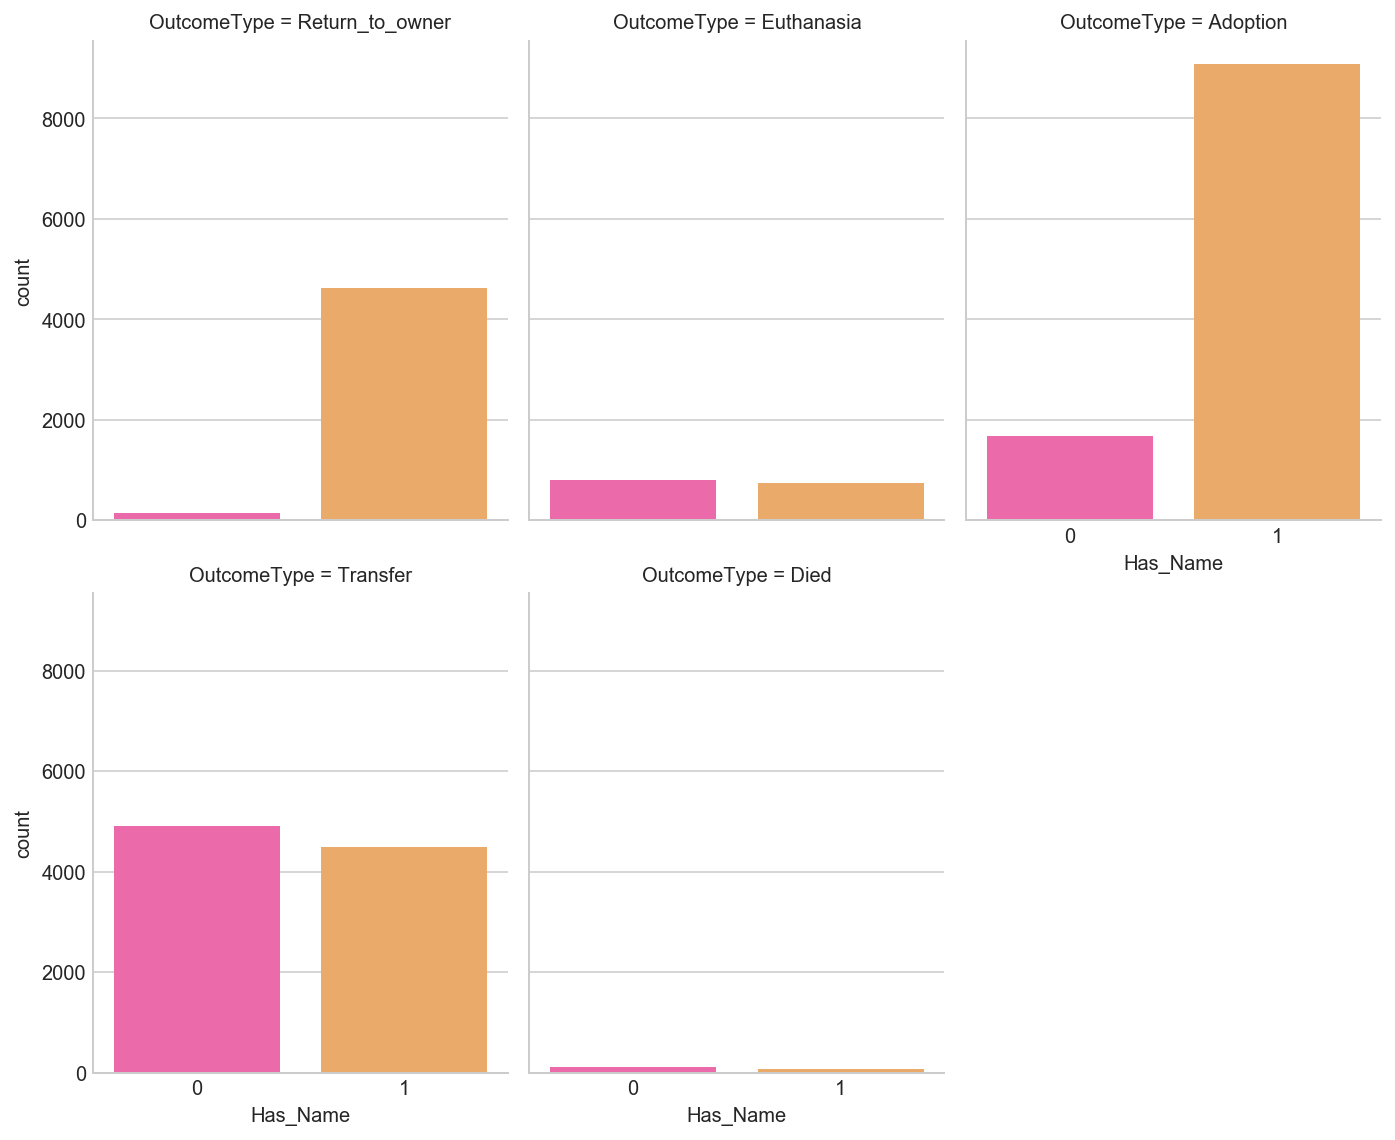

In [73]:
# Does outcome depend on having a name?
sns.factorplot("Has_Name", col="OutcomeType", col_wrap=3, data=train, 
               kind="count", size=4, aspect=.8, palette = "spring")
plt.show()

#### SPAYED vs INTACT

In [74]:
train.SexuponOutcome.value_counts()

Neutered Male    9779
Spayed Female    8819
Intact Male      3519
Intact Female    3504
Unknown          1089
Name: SexuponOutcome, dtype: int64

In [75]:
#let's check whether the outcomes differ for spayed and non spayed animals
train["Is_Spayed"] =  train['SexuponOutcome'].apply(
    lambda x:'unknown' if x=="Unknown" else 'intact' if 'Intact' in str(x) else 'spayed')

In [76]:
train.head(3)

,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,Breed,Color,NumberOfPeriod,Period,NumberOfDays,Bin,Has_Name,Is_Spayed
AnimalID,,,,,,,,,,,,,,
A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,Shetland Sheepdog Mix,Brown/White,1,year,365.0,3,1,spayed
A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,Domestic Shorthair Mix,Cream Tabby,1,year,365.0,3,1,spayed
A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,Pit Bull Mix,Blue/White,2,years,730.0,7,1,spayed


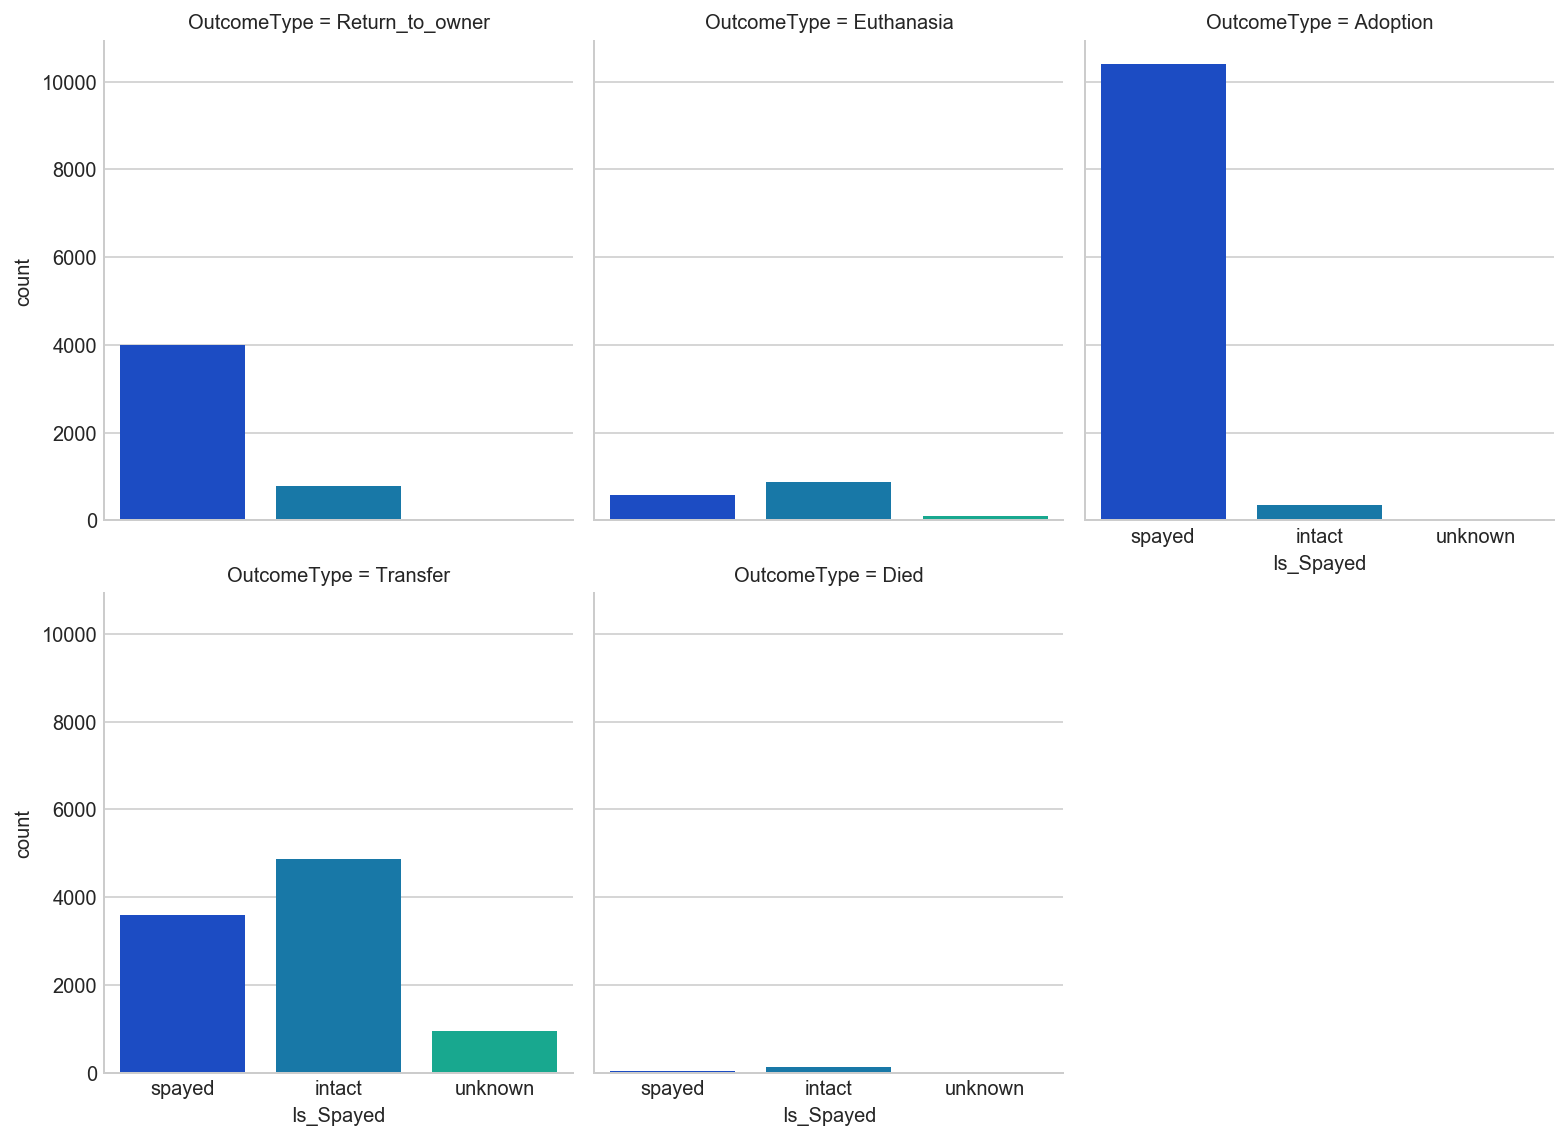

In [77]:
sns.factorplot("Is_Spayed", col="OutcomeType", col_wrap=3, data=train, 
               kind="count", size=4, aspect=.9, palette = "winter")
plt.show()

#### SEX

In [78]:
train.SexuponOutcome.value_counts()

Neutered Male    9779
Spayed Female    8819
Intact Male      3519
Intact Female    3504
Unknown          1089
Name: SexuponOutcome, dtype: int64

In [79]:
# Are male and female outcomes different?
train["Sex"] =  train['SexuponOutcome'].apply(
    lambda x:'F' if 'Female' in str(x) else 'M' if 'Male' in str(x) else 'unknown')

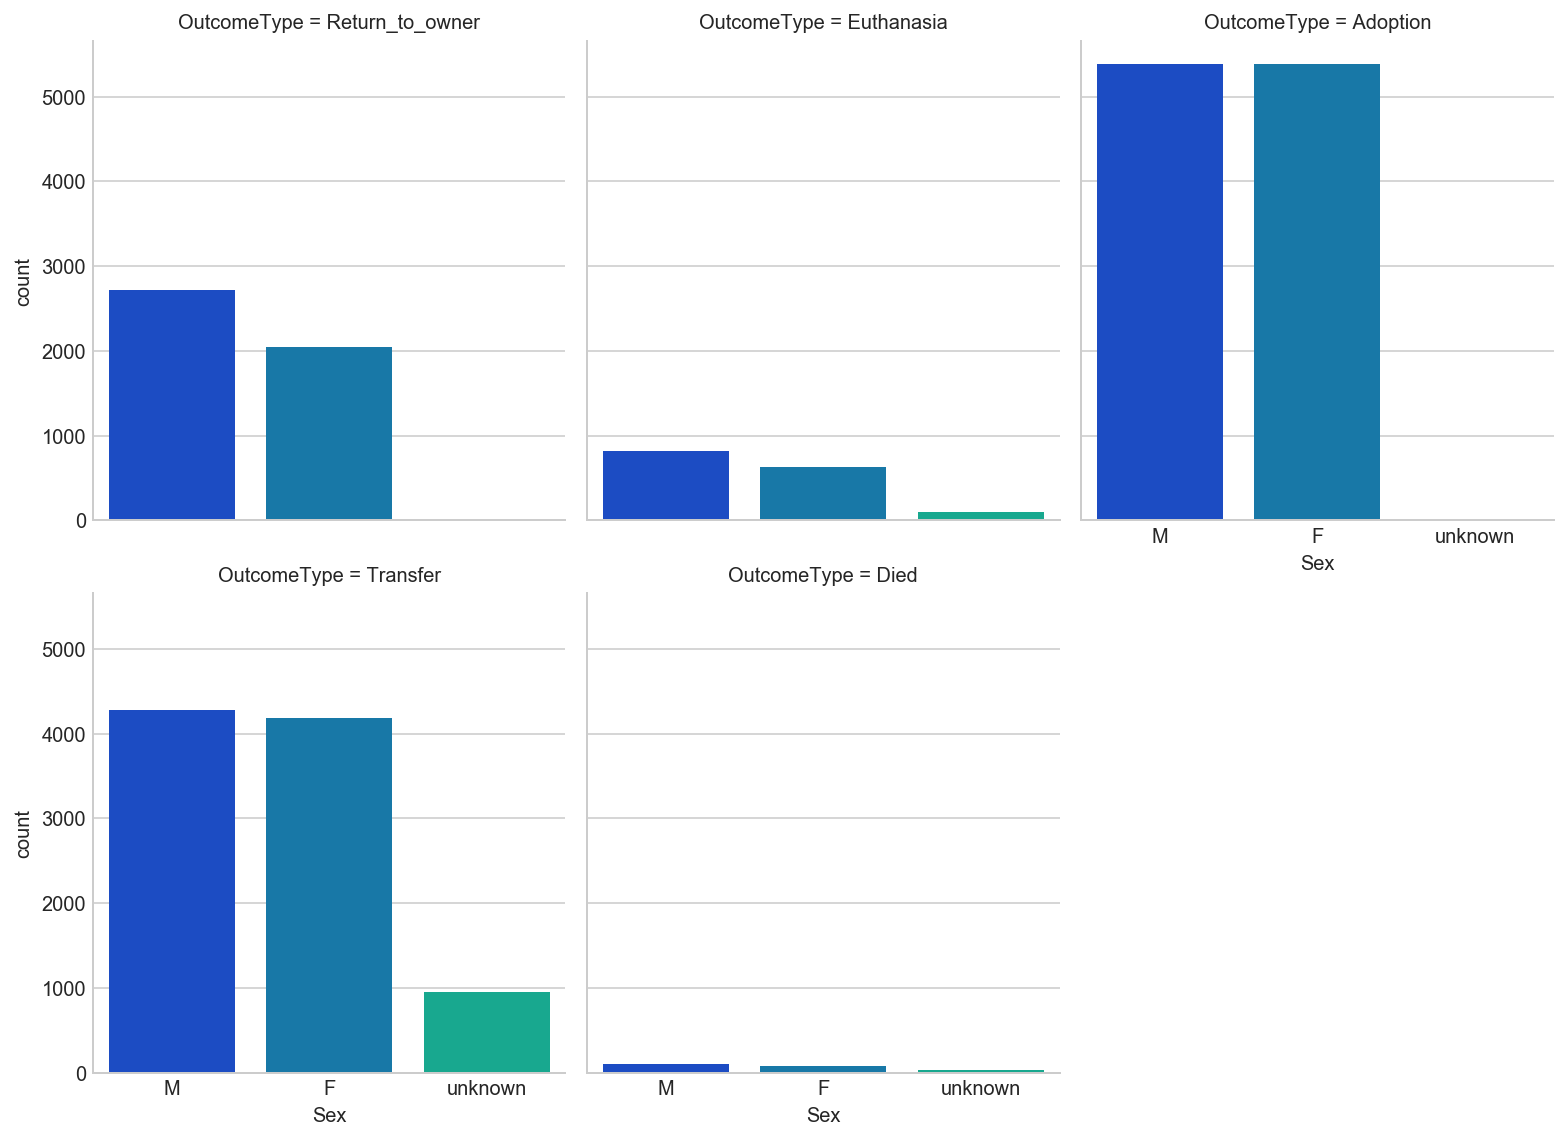

In [80]:
sns.factorplot("Sex", col="OutcomeType", col_wrap=3, data=train, 
               kind="count", size=4, aspect=.9, palette = "winter")
plt.show()

Not much of difference here ^^, probably not the best predictor.

#### OUTCOME SUBTYPE

In [85]:
train.OutcomeSubtype.value_counts()

Partner                7816
Foster                 1800
SCRP                   1599
Suffering              1002
Aggressive              320
Offsite                 165
In Kennel               114
Behavior                 86
Rabies Risk              74
Medical                  66
In Foster                52
Enroute                   8
Court/Investigation       6
At Vet                    4
In Surgery                3
Barn                      2
Name: OutcomeSubtype, dtype: int64

In [87]:
#Replacing Subtypes with count smaller than 100 with "Other" label
train.OutcomeSubtype = train.OutcomeSubtype.replace({
                                                
                                                'Behavior': 'Other',
                                                 'Rabies Risk': 'Other',
                                                'Medical': 'Other',
                                                'In Foster':'Other',
                                                 'Enroute': 'Other',
                                                 'Court/Investigation': 'Other',
                                                 'At Vet': 'Other',
                                                'In Surgery': 'Other',
                                                 'Barn' : 'Other'})

In [88]:
train.OutcomeSubtype.value_counts()

Partner       7816
Foster        1800
SCRP          1599
Suffering     1002
Aggressive     320
Other          301
Offsite        165
In Kennel      114
Name: OutcomeSubtype, dtype: int64

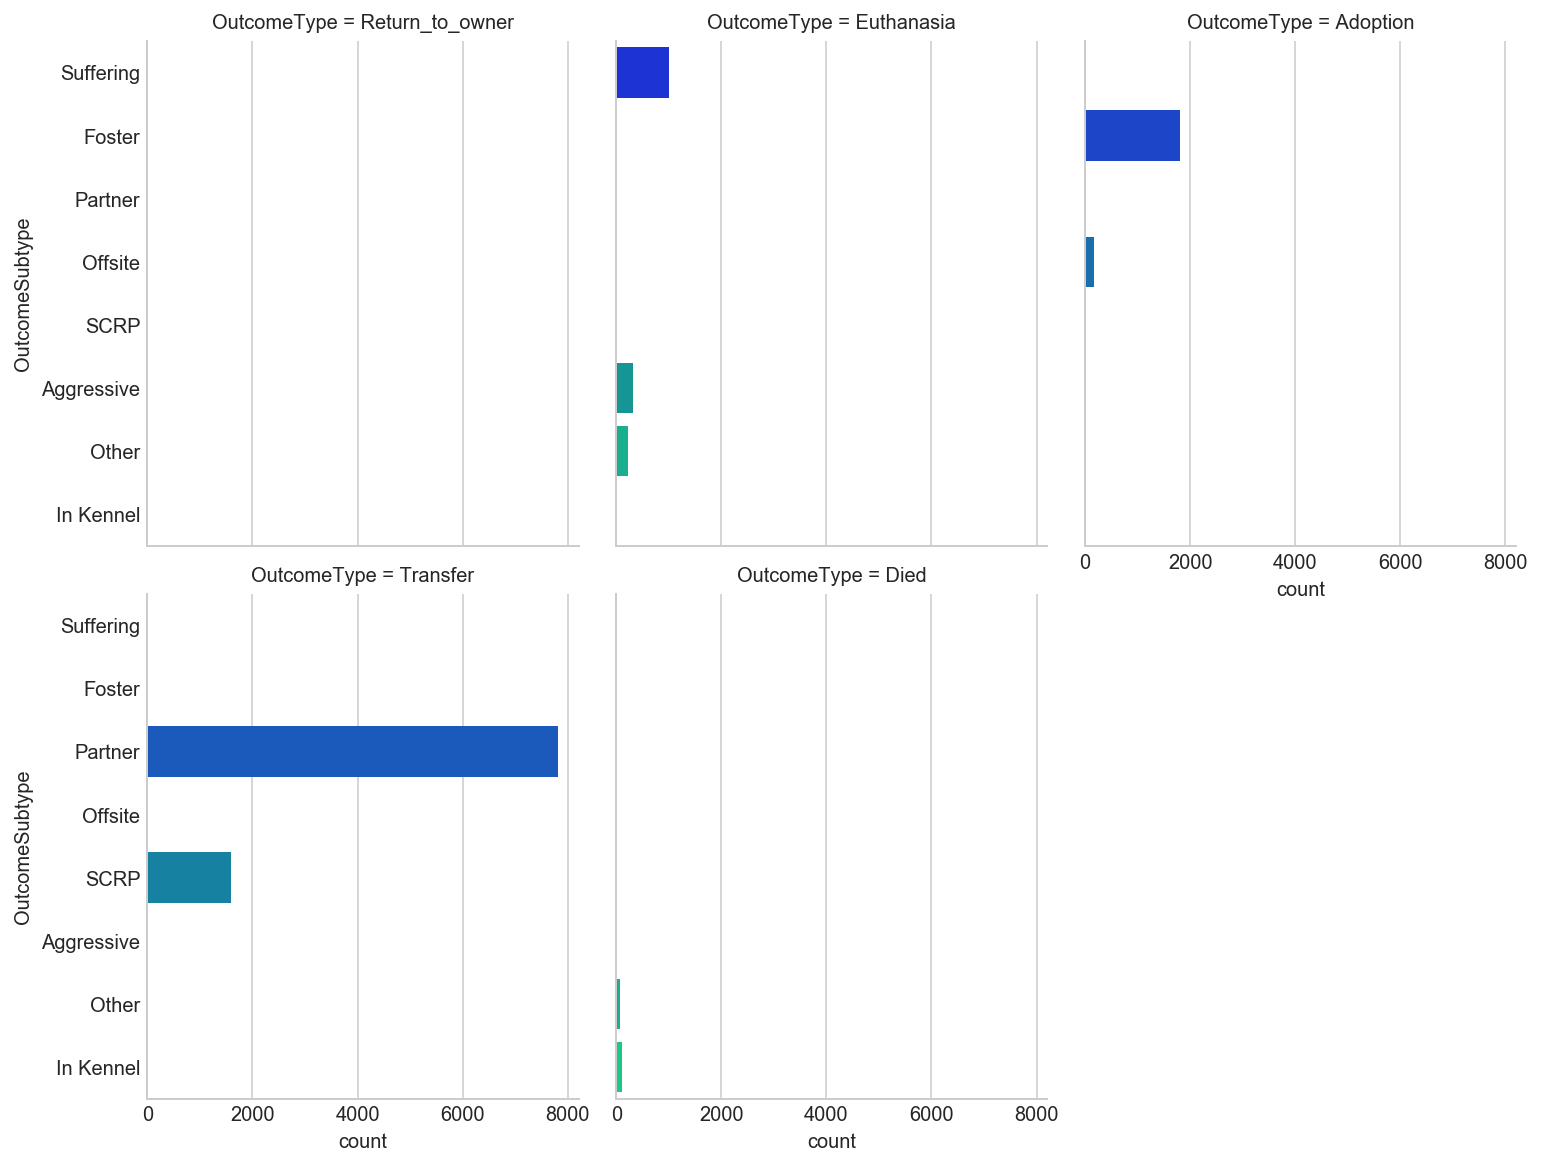

In [89]:
sns.factorplot(y="OutcomeSubtype", col="OutcomeType", col_wrap=3, data=train, 
               kind="count", size=4, aspect=.9, palette = "winter")
plt.show()

#### MIX vs NOT MIX